# Lab 06 - Data Preprocessing I

**DUE: Feb 12, 2024 (Monday)**  
Pair Programming: Optional  

Name(s): Harrison Halesworth 
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am
Semester: Spring 2024
Instructors: Brian King, Joshua Stough


---
# Objectives
* Experience the "joy" that is data munging. Munge, munge, munge!
* Start dealing with noisy, unclean, real-world data
* Work with times and dates in your data

## Pair programming
Don't forget that pair programming is allowed and even encouraged on these labs moving forward.

# Introduction
As you learned in class, data cleaning represents a large part of the work of the data scientist.  You are going to download a real-world dataset, and do some preliminary cleaning, EDA, and reporting.

---
# Preparing for your lab

Do each of the following...

* Modify the header cell above with your name(s).
* If you haven't yet, create a new folder at the same level as your labs and hw folder you created, called `data`.
    * This folder will store the data that you are working with through the semester. Sometimes the data we work with can be downloaded directly from an online URL, and other times (such as this exercise), the data will need to be downloaded from public repositories locally onto your laptop. And worse yet, most data are not cleaned and tidied up for you to play with!

---
## The Pennsylvania State Climatologist Database

Penn State has an excellent public database of weather observations collected from a wide range of stations scattered throughout the state. Some of them go back to the 1940s. For this lab, we're going to explore one of those datasets – Williamsport, PA.

Go to the [The Pennsylvania State Climatologist](http://climate.met.psu.edu). From this page:
* Select **Data**
* Select **Data Archive**
* For **Select a network** select **FAA Hourly**.
* You are going to investigate the weather observations *Williamsport, PA*, whose FAA code is **KIPT**. Select it.

Now you need to select the range of observations and variables we're interested in. Enter the following:

* Start and End Dates: **2000-01-01** to **2023-12-31**.
* Select ALL attributes to download (from Date/Time, Number of observations… etc… right through Max Wind Speed).
* Output file type should be a CSV file
* Select Yes to include Metadata. (Metadata is information about data. This usually contains valuable information, and you almost always want to retain this information unless you are provided with an explicit *schema*, which we are not.)

**Click Submit.**

Download the data (which will most likely place your data into your Downloads folder.)  It'll be a long filename. That's fine. I usually always add the suffix "_raw" to indicate this is the raw data that I'm working with from my source. *Never lose track of your original dataset.*

You are not done. Move that file over to your `data` directory you created (which should be at the same directly level as your `labs` directory.) If you placed the .csv file in the correct place, then your path should be:

`../data/faa_hourly-KIPT_20000101-20231231_raw.csv`




In [76]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit              : a671b5a8bf5dd13fb19f0e88edc679bc9e15c673
python              : 3.11.5.final.0
python-bits         : 64
OS                  : Windows
OS-release          : 10
Version             : 10.0.22621
machine             : AMD64
processor           : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
byteorder           : little
LC_ALL              : None
LANG                : en_US.UTF-8
LOCALE              : English_United States.1252

pandas              : 2.1.4
numpy               : 1.26.3
pytz                : 2023.3.post1
dateutil            : 2.8.2
setuptools          : 68.2.2
pip                 : 23.3.1
Cython              : None
pytest              : 7.4.0
hypothesis          : None
sphinx              : 5.0.2
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : 4.9.3
html5lib            : None
pymysql             : None
psycopg2            : None
jinja2              : 3.1.2


---
**1)**	 [P] Use pandas to read in your data file you downloaded above, which you should have placed in your data directory. Call the data frame `df_temps`.  Read in the entire dataset, however, be sure to ignore the first 16 rows from the input (HINT: use the `skiprows=` option!)

**NOTE:** ALWAYS BE SURE TO LOOK AT YOUR ACTUAL DATA AS PLAIN TEXT BEFORE TRYING TO READ IN A RAW DATASET! JUST BECAUSE A DATASET HAS A `.csv` EXTENSION DOES NOT MEAN THAT YOU CAN RELY ON EVERY ROW BEING A PROPERLY FORMATTED ROW! For instance, notice that the header row is scattered throughout your data! Notice that you have some extra columns at the end that are consistently empty! The inexperienced data scientists are tempted to manually edit the file to make it easy to read. *NO. WRONG! BAD DATA SCIENTIST!*

>**Never change your raw data.**
>
> Write your Python cleaning code to always work with raw, uncleaned data. Why? In practice, your data file may be huge. You may need to repeatedly grab fresh data, and those data will only have the same issues. Do you really want to repeat your manual editing silliness every time you have a fresh file? No! It may take a bit more work up front, but ALWAYS strive to write code to preprocess every aspect of your raw data file! It will always save you work later!

In [77]:
# ANSWER

df_temps = pd.read_csv("C:\\Users\\hhale\\csci349_2024sp\\data\\faa_hourly-KIPT_20000101-20231231_raw.csv", skiprows=range(0,15))
df_temps.head()

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph),Unnamed: 13
0,2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.7,59.0,17.3,1015.2,280.0,17.3,NaN
1,2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.1,1015.9,280.0,16.1,NaN
2,2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.0,1016.3,280.0,15.0,NaN
3,2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.1,1016.6,270.0,16.1,NaN
4,2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.7,1017.3,280.0,12.7,NaN


---
**2)**	Report the general structure of the data frame using `df_temps.info()`. Notice any column that is read in as a plain `object` type. You should have one column with this problem.

In [78]:
# ANSWER

df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                207730 non-null  object 
 1   Number of Observations (n/a)   207730 non-null  int64  
 2   Average Temp (F)               206660 non-null  float64
 3   Max Temp (F)                   206660 non-null  float64
 4   Min Temp (F)                   206660 non-null  float64
 5   Average Dewpoint Temp (F)      206538 non-null  float64
 6   1 Hour Precip (in)             33203 non-null   float64
 7   Max Wind Gust (mph)            28228 non-null   float64
 8   Average Relative Humidity (%)  202150 non-null  float64
 9   Average Wind Speed (mph)       207117 non-null  float64
 10  Average Station Pressure (mb)  207369 non-null  float64
 11  Average Wind Direction (deg)   173683 non-null  float64
 12  Max Wind Speed (mph)          

There are 14 data columns with most being float64 data but Date/Time is an object.

---
This is a pretty good dataset with lots of real problems! It gives you a chance to understand how important it is to select the smallest, yet most accurate data type for every variable. This is particularly true with respect to your memory footprint. With enormous data involving millions of records, you often need to perform various paging exercises to load in chunks of data into memory, substantially slowing down the machine learning methods. In other words, the more data you can fit in memory, the better! (In reality, the above is quoting a relatively small amount of memory. But, it's never too early to develop good habits!)


---
**3)**	[P] Read about the `memory_usage()` method of pandas data frames. Then, report the total memory in bytes for each variable of df_temps. Set the parameter `drop=True`, to get the most accurate assessment of your total memory usage.

In [79]:
# ANSWER
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.memory_usage.html

usage = df_temps.memory_usage(deep=True)
print(usage)

Index                                 132
Date/Time (GMT)                  15787480
Number of Observations (n/a)      1661840
Average Temp (F)                  1661840
Max Temp (F)                      1661840
Min Temp (F)                      1661840
Average Dewpoint Temp (F)         1661840
1 Hour Precip (in)                1661840
Max Wind Gust (mph)               1661840
Average Relative Humidity (%)     1661840
Average Wind Speed (mph)          1661840
Average Station Pressure (mb)     1661840
Average Wind Direction (deg)      1661840
Max Wind Speed (mph)              1661840
Unnamed: 13                       1661840
dtype: int64


---
**4)**	Report the total memory required for the data frame in MB. (Just sum the previous answer and correct your units accordingly)

In [80]:
# ANSWER

sum = usage.sum()
mb = sum / (1024*1024)
print("The amount of memory required for this data frame is : " + str(mb.round(1)) + "MB.")

The amount of memory required for this data frame is : 35.7MB.


---
**5)**	[P] You have a rather annoying extra column that was read in in the last column position. (Look closely at the output of `info()` above!) You should always confirm that it's garbage before deleting it. Write the single line of code that reports the count of valid values in the last column (HINT: `count()`)

 

In [81]:
# ANSWER

bad_col_count = df_temps.iloc[:,-1].count()
print("The amount of valid values in the last column is : " + str(bad_col_count))

The amount of valid values in the last column is : 0


---
**6)**	Drop that last column from `df_temps`.

In [82]:
# ANSWER

df_temps = df_temps.dropna(axis=1, how='all')
df_temps.head()

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
0,2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.7,59.0,17.3,1015.2,280.0,17.3
1,2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.1,1015.9,280.0,16.1
2,2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.0,1016.3,280.0,15.0
3,2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.1,1016.6,270.0,16.1
4,2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.7,1017.3,280.0,12.7


---
**7)**	[M] Look over the data type column in the `info()` output. ALWAYS pay attention to the types of each variable. In particular, pay attention to the variables that are read in as `object` type. This implies that pandas did not have enough confidence to convert the type itself, and you need to do it. Are there any `object` types? If so what? What format are the data in that column(s)?

In [83]:
# ANSWER

df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                207730 non-null  object 
 1   Number of Observations (n/a)   207730 non-null  int64  
 2   Average Temp (F)               206660 non-null  float64
 3   Max Temp (F)                   206660 non-null  float64
 4   Min Temp (F)                   206660 non-null  float64
 5   Average Dewpoint Temp (F)      206538 non-null  float64
 6   1 Hour Precip (in)             33203 non-null   float64
 7   Max Wind Gust (mph)            28228 non-null   float64
 8   Average Relative Humidity (%)  202150 non-null  float64
 9   Average Wind Speed (mph)       207117 non-null  float64
 10  Average Station Pressure (mb)  207369 non-null  float64
 11  Average Wind Direction (deg)   173683 non-null  float64
 12  Max Wind Speed (mph)          

**ANSWER** The column that contains objects in it is the Date/Time column, which contains what you'd expect in the format of YYYY-MM-DD HH:MM:SS

---
**8)**	[P] How many NaN values are in each variable? (NOTE: Leave the NaN fields alone! The fact that they are missing is IMPORTANT! And, leave the date/time variable in the first column alone. Dates are very common in data, and it is important that you represent dates as actual date types. We'll deal with that shortly.)

In [84]:
# ANSWER
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

count_nan = df_temps.isna().sum()
print("Here are the NaN counts for each column : \n" + str(count_nan))

Here are the NaN counts for each column : 
Date/Time (GMT)                       0
Number of Observations (n/a)          0
Average Temp (F)                   1070
Max Temp (F)                       1070
Min Temp (F)                       1070
Average Dewpoint Temp (F)          1192
1 Hour Precip (in)               174527
Max Wind Gust (mph)              179502
Average Relative Humidity (%)      5580
Average Wind Speed (mph)            613
Average Station Pressure (mb)       361
Average Wind Direction (deg)      34047
Max Wind Speed (mph)                613
dtype: int64


---
**9)**	[P] Report the NaN output as a percentage of the total number of values that are missing for each variable

In [85]:
# ANSWER

pct = count_nan / df_temps.shape[0]
print("Here are the NaN counts as percentages of total values : \n" + str((pct*100).round(2)))

Here are the NaN counts as percentages of total values : 
Date/Time (GMT)                   0.00
Number of Observations (n/a)      0.00
Average Temp (F)                  0.52
Max Temp (F)                      0.52
Min Temp (F)                      0.52
Average Dewpoint Temp (F)         0.57
1 Hour Precip (in)               84.02
Max Wind Gust (mph)              86.41
Average Relative Humidity (%)     2.69
Average Wind Speed (mph)          0.30
Average Station Pressure (mb)     0.17
Average Wind Direction (deg)     16.39
Max Wind Speed (mph)              0.30
dtype: float64


---
**10)**	[PM] Report the number of observations have at least one missing value. Report this as a raw number and as a percentage of the total number of observations. Then, from the answer to the previous problem, clearly state why this is NOT a problem to be concerned about for this particular dataset. (HINT: Which variable(s) have most of the missing data? Why?)


In [86]:
# ANSWER

missing_one_count = df_temps[df_temps.isna().any(axis=1)].shape[0]
pct_missing_one = missing_one_count / df_temps.shape[0]
print("The number of observations missing at least one value : " + str(missing_one_count))
print("The percent of observations missing at least one value : " + str(round(pct_missing_one*100,2)) + " %")

The number of observations missing at least one value : 201609
The percent of observations missing at least one value : 97.05 %


**ANSWER:** Nearly the entire dataset contains an NaN value in one attribute but this is not a problem because the attributes that are causing this to be so are related to wind and precipitation which aren't absolutely imperative to the purpose of this dataset.

---
**11)**	[P] Look over your data types. By default, most of the time pandas will convert your integer types to a 64-bit integer, and floating point types will use double precision numbers. You can do far better. Read over the `pd.to_numeric()` function. Did you notice the parameter called `downcast`? Go back and read about this parameter. Downcast your types accordingly. Then, look over the output of `info()` and report your latest memory usage in MB.





In [87]:
# ANSWER

num_cols = df_temps.select_dtypes(include=["int64", "float64"]).columns
int_cols = df_temps[num_cols].select_dtypes(include="int64").columns
float_cols = df_temps[num_cols].select_dtypes(include="float64").columns

df_temps[int_cols] = df_temps[int_cols].apply(pd.to_numeric, downcast="integer")
df_temps[float_cols] = df_temps[float_cols].apply(pd.to_numeric, downcast="float")

df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                207730 non-null  object 
 1   Number of Observations (n/a)   207730 non-null  int8   
 2   Average Temp (F)               206660 non-null  float32
 3   Max Temp (F)                   206660 non-null  float32
 4   Min Temp (F)                   206660 non-null  float32
 5   Average Dewpoint Temp (F)      206538 non-null  float32
 6   1 Hour Precip (in)             33203 non-null   float32
 7   Max Wind Gust (mph)            28228 non-null   float32
 8   Average Relative Humidity (%)  202150 non-null  float32
 9   Average Wind Speed (mph)       207117 non-null  float32
 10  Average Station Pressure (mb)  207369 non-null  float32
 11  Average Wind Direction (deg)   173683 non-null  float32
 12  Max Wind Speed (mph)          

---
**12)**	[P] How much did our memory footprint improve? (Show the total memory usage using `deep=True`). Report the total memory usage in MB, and report the percentage improvement. (HINT: You should have reduced your memory footprint by about 32.7% so far)

In [88]:
# ANSWER

usage2 = df_temps.memory_usage(deep=True)
print(usage)

sum2 = usage2.sum()
mb2 = sum2 / (1024*1024)
pct_improved = abs(round(((mb2-mb)/mb)*100,1))
print("The amount of memory required for this data frame is : " + str(mb2.round(1)) + "MB.")
print("The percent improvement of memory usage is : " + str(pct_improved) + "%")

Index                                 132
Date/Time (GMT)                  15787480
Number of Observations (n/a)      1661840
Average Temp (F)                  1661840
Max Temp (F)                      1661840
Min Temp (F)                      1661840
Average Dewpoint Temp (F)         1661840
1 Hour Precip (in)                1661840
Max Wind Gust (mph)               1661840
Average Relative Humidity (%)     1661840
Average Wind Speed (mph)          1661840
Average Station Pressure (mb)     1661840
Average Wind Direction (deg)      1661840
Max Wind Speed (mph)              1661840
Unnamed: 13                       1661840
dtype: int64
The amount of memory required for this data frame is : 24.0MB.
The percent improvement of memory usage is : 32.8%


---
# Data Transformations with Dates

It is very common to deal with dates in data. Unfortunately, few organizations around the world have agreed to one format for universally representing dates in data. Adding to the complexity are time zones that you must deal with. We'll discuss that later. Let's suppose we wanted to represent February 6, 2023, depending on your location in the world, the date might be stored in the data as:

* 02/06/2023
* 06/02/23
* 06/02/2023
* 06.02.2023
* 2023-Feb-06
* February 06, 2023
* 06-Feb-2023
* 20230206

And, there are others! Insanity! Can't we all just get along??? (Apparently not, especially when it comes to dates and times, and currencies, and food, and etc.) The fact is that these are all acceptable formats for dates. Sometimes pandas can do a pretty good just detecting date fields. However, as we noticed in this case, not always. It's up to YOU to make sure you convert your data to the most appropriate type.

Generally speaking, when your data consists of a series of observations recorded over time, we refer to these types of data as **time series** data. And, usually every observation will have a time or a date variable that identifies when the observation was recorded.

[Time series / date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) has just about everything you need to deal with dates with time series data. It has far more than you'll need   . As with most of the API with core packages like pandas, there is a LOT to absorb, and at best, you'll just become familiar with how to find the answers you are after in their documentation!

This portion of the lab will help you learn how to confidently work with dates and times in data.



---
**13)**	[M] There are four primary classes in pandas for working with dates and times? Consider the Scalar Class for each, and state what concept each is representing.

**ANSWER:** A TimeStamp represents a specific timestamp, naturally. A specific moment in time. DateTimeIndex is an index of TimeStamp objects. A Period represents an interval of time that doesn't change. A PeriodIndex is similar to DateTimeIndex just with Period objects.

---
**14)**	[M] For each above, state the primary creation method used to create each type of data

**ANSWER:** For a TimeStamp you use pd.to_datetime() or pd.Timestamp(), for a TimeStampIndex you use pd.date_range(), for a Period you use pd.Period(), and for a PeriodIndex you use pd.period_range().

---
**15)**	[P] Create a Timestamp object from the string "07/04/19", which is a date representing July 4, 2019. Store the object as `d1` and show it.

In [89]:
# ANSWER


d1 = pd.to_datetime("07/04/19")
print(d1)

2019-07-04 00:00:00


---
**16)**	[P] Using `d1` and string formatting codes, print the string from `d1`:

"Today's date is Thursday, July 4, 2019". 

In [90]:
# ANSWER
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.strftime.html#pandas.Timestamp.strftime

print("Today's date is {}, {} {}, {}".format(d1.strftime("%A"), d1.strftime("%B"), d1.day, d1.year))

Today's date is Thursday, July 4, 2019


---
**17)**	[P] Create another Timestamp object representing Sept 7, 2019 at 3pm, called `d2`. Report it

In [91]:
# ANSWER

d2 = pd.to_datetime("2019-09-07T15")
print(d2)

2019-09-07 15:00:00


---
**18)**	[P] Subtract `d1` from the value of `d2` (i.e `d2 - d1`) and report the difference as the number of days and seconds between these two. Also report the difference as total seconds.  (NOTE: The difference should be 65 days, 54000 seconds. Or 5670000 total seconds.)

In [92]:
# ANSWER

diff = d2 - d1
print("The difference in days and seconds is : " + str(diff.days) + "days and " + str(diff.seconds) + " seconds.")
print("The difference in seconds is : " + str(int(diff.total_seconds())) + " seconds.")

The difference in days and seconds is : 65days and 54000 seconds.
The difference in seconds is : 5670000 seconds.


---
**19)**	[P] Create a new Timestamp object from the string "2019-07-01 08:30pm", but, localize the time stamp to represent the time in the US Eastern Time Zone. Store the result as `d3` and output it.

In [93]:
# ANSWER

d3 = pd.Timestamp("2019-07-01 08:30pm", tz="US/Eastern")
print(d3)

2019-07-01 20:30:00-04:00


---
**20)**	[P] Show time represented by `d3`, but converted to the US / Pacific Time Zone. The time reported should be three hours earlier than EST shown in the previous question.

In [94]:
# ANSWER

print(d3.tz_convert("US/Pacific"))

2019-07-01 17:30:00-07:00


---
**21)**	[P] Create a Timestamp object representing right now, stored as `ts_now`. Report the result.


In [95]:
# ANSWER

ts_now = pd.Timestamp.now()
print(ts_now)

2024-02-12 19:42:06.064351


---
**22)**	[P] Create a Timedelta object representing 1 hour, stored as `td_hour`. Report the result.

In [96]:
# ANSWER

td_hour = pd.Timedelta(1, "h")
print(td_hour)

0 days 01:00:00


---
**23)**	[P] Demonstrate how you can do basic mathematical operations by adding 6 hours to `ts_now` using `td_hour` and basic math operations. (i.e. No loops or further calculations necessary!)

In [97]:
# ANSWER

ts_now + (6*td_hour)

Timestamp('2024-02-13 01:42:06.064351')

---
**24)**	[P] Create a DatetimeIndex object that represents every hour during the month of January, 2020. The first index should be midnight, January 1, 2020, and the last index should be January 31, 2020 at 11pm. Store the object as `dr`. (HINT – use the `pd.date_range()` method)

In [98]:
# ANSWER


dr = pd.date_range(start="2020-01-01", end="2020-01-31T23", freq="H")
print(dr)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-31 14:00:00', '2020-01-31 15:00:00',
               '2020-01-31 16:00:00', '2020-01-31 17:00:00',
               '2020-01-31 18:00:00', '2020-01-31 19:00:00',
               '2020-01-31 20:00:00', '2020-01-31 21:00:00',
               '2020-01-31 22:00:00', '2020-01-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')


---
OK, so that was a little practice with understanding how to work a bit with dates and times. They are objects, with lots of methods to help you access those timestamps in different ways.

Back to our weather data. Usually, the index to a dataframe represents the data you will use most often to access and select your data. In the case of a time series dataset, the index is usually the time. In other words, every observation should be indexed by a Timestamp object! You'll make that happen next…

---
**25)**	[P] The first variable in our data is currently an object. But, notice the name and its units? It's a date/time in the GMT time zone! Convert the first column of data into an actual time stamp.

NOTE: You can NOT simply generate this column using your own date range object! You must generate it directly from the actual time/date stamp in the data! Why? **This is very important. Do NOT ever be fooled into thinking any real-world dataset you are dealing with is 100% complete.** There are **missing observations** in these data, and your data will be massively flawed if you neglect this! If you simply try to use a date range between 1/1 – 12/31, with every hour, you are making an incorrect assumption that every observation is present.

(HINT: Go back to your reference table. You are creating an array of timestamps. Which function? Either `to_datetime` or `date_range`. We already told you that `date_range` is wrong above.)


In [99]:
# ANSWER

df_temps["Date/Time (GMT)"] = pd.to_datetime(df_temps["Date/Time (GMT)"], utc=True)
print(df_temps.head())

            Date/Time (GMT)  Number of Observations (n/a)  Average Temp (F)  \
0 2000-01-01 00:00:00+00:00                             1              26.1   
1 2000-01-01 01:00:00+00:00                             1              26.1   
2 2000-01-01 02:00:00+00:00                             1              26.1   
3 2000-01-01 03:00:00+00:00                             1              26.1   
4 2000-01-01 04:00:00+00:00                             1              26.1   

   Max Temp (F)  Min Temp (F)  Average Dewpoint Temp (F)  1 Hour Precip (in)  \
0          26.1          26.1                       14.0                 NaN   
1          26.1          26.1                       14.0                 NaN   
2          26.1          26.1                       15.1                 NaN   
3          26.1          26.1                       12.0                 NaN   
4          26.1          26.1                       14.0                 NaN   

   Max Wind Gust (mph)  Average Relative Hum

---
**26)**	[P] Confirm that your first column data type is now a timestamp by showing the output of `df_temps.info()`. (It should show that it is datetime64, to be exact) .  Then, show the values of the first column of the first AND last row only.  Your result should look like:

```
0        2000-01-01 00:00:00
207729   2023-12-31 23:00:00
```

In [100]:
# ANSWER

df_temps.info()
print(df_temps.iloc[[0,-1],0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207730 entries, 0 to 207729
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   Date/Time (GMT)                207730 non-null  datetime64[ns, UTC]
 1   Number of Observations (n/a)   207730 non-null  int8               
 2   Average Temp (F)               206660 non-null  float32            
 3   Max Temp (F)                   206660 non-null  float32            
 4   Min Temp (F)                   206660 non-null  float32            
 5   Average Dewpoint Temp (F)      206538 non-null  float32            
 6   1 Hour Precip (in)             33203 non-null   float32            
 7   Max Wind Gust (mph)            28228 non-null   float32            
 8   Average Relative Humidity (%)  202150 non-null  float32            
 9   Average Wind Speed (mph)       207117 non-null  float32            
 10  Average 

---
**27)**	Finally, let's move that first column to be the new index for your dataframe. Use the `set_index` method of `df_temps` to be the first column of data, then use the `drop` method to eliminate the first column. It is now your index, and thus there is no need to keep this information twice.

In [101]:
# ANSWER

df_temps = df_temps.set_index(df_temps.columns[0])
df_temps = df_temps.drop(columns=[df_temps.columns[0]])
df_temps.head()

,Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,
2000-01-01 00:00:00+00:00,26.1,26.1,26.1,14.0,NaN,20.700001,59.0,17.299999,1015.200012,280.0,17.299999
2000-01-01 01:00:00+00:00,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.100000,1015.900024,280.0,16.100000
2000-01-01 02:00:00+00:00,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.000000,1016.299988,280.0,15.000000
2000-01-01 03:00:00+00:00,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.100000,1016.599976,270.0,16.100000
2000-01-01 04:00:00+00:00,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.700000,1017.299988,280.0,12.700000


---

**28)**	[P] Give one final report on the total memory usage, and also show the % memory reduction made compared to when you first loaded the data.

Again, please take this seriously. This is a substantial amount of memory saved! Why? Because you took the time to properly process every column to have it represent its most accurate type, using the smallest type necessary. HUGE savings! (HINT: You should see a savings of 70.56% compared to the original data load!)

In [102]:
# ANSWER

usage3 = df_temps.memory_usage(deep=True)
print(usage)

sum3 = usage3.sum()
mb3 = sum3 / (1024*1024)
pct_improved = abs(round(((mb3-mb)/mb)*100,1))
print("The amount of memory required for this data frame is : " + str(mb3.round(1)) + "MB.")
print("The percent improvement of memory usage is : " + str(pct_improved) + "%")

Index                                 132
Date/Time (GMT)                  15787480
Number of Observations (n/a)      1661840
Average Temp (F)                  1661840
Max Temp (F)                      1661840
Min Temp (F)                      1661840
Average Dewpoint Temp (F)         1661840
1 Hour Precip (in)                1661840
Max Wind Gust (mph)               1661840
Average Relative Humidity (%)     1661840
Average Wind Speed (mph)          1661840
Average Station Pressure (mb)     1661840
Average Wind Direction (deg)      1661840
Max Wind Speed (mph)              1661840
Unnamed: 13                       1661840
dtype: int64
The amount of memory required for this data frame is : 10.3MB.
The percent improvement of memory usage is : 71.1%


---
**29)**	 [P] This dataset has missing observations. But, how many? First, calculate how many observations SHOULD be there. Use the difference between the first and last index value to compute this.

HINT: You should have well over 2500 missing hourly observations.

In [103]:
# ANSWER

expected = int((df_temps.index[-1] - df_temps.index[0]) / td_hour)
missing = diff-df_temps.shape[0]+1
print("This dataset is missing " + str(missing) + " observations.")

TypeError: unsupported operand type(s) for -: 'Timedelta' and 'int'

---
**30)**	[P] There are quite a lot! It's time to investigate. Create a data frame called df_missing that has an index of the time stamp of every missing date, with a simple variable called "missing" that has a value of 1 for every entry. (i.e. it should only contain the missing dates.) Report the number of rows in df_missing. It should match the number you computed previously.

In [104]:
# ANSWER

index = df_temps.index
start = index.min()
end = index.max()

expected = pd.date_range(start=start, end=end, freq='H')
missing_index = expected_dates.difference(index)

df_missing = pd.DataFrame({"missing": 1}, index=missing_index)

missing = df_missing.shape[0]
print("This dataset is missing " + str(missing) + " observations.")

This dataset is missing 2654 observations.


---
**31)**	Let's get a sense of which years seem to be missing the most data. How? Well, the easiest approach is probably to use the `resample()` method of data frames. Check out [this section on resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling). This method works phenomenally well for grouping and aggregating your data when you have a datetime index type.

We're going to resample our data by year, and perform a count aggregation all in one line:

Enter the following:
`df_missing_by_year = df_missing.resample('Y').count()`

There are many, many ways you can resample your data. You need to jump over to the options for dateoffset objects. Check out [DateOffset information](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) you'll need.

Show the result of `df_missing_by_year`

HINT - your first four rows should something like the following...
```
                           missing
2000-12-31 00:00:00+00:00      792
2001-12-31 00:00:00+00:00       54
2002-12-31 00:00:00+00:00       30
2003-12-31 00:00:00+00:00       39
```


In [105]:
# ANSWER

df_missing_by_year = df_missing.resample('Y').count()
df_missing_by_year.head()

,missing
2000-12-31 00:00:00+00:00,792
2001-12-31 00:00:00+00:00,54
2002-12-31 00:00:00+00:00,30
2003-12-31 00:00:00+00:00,39
2004-12-31 00:00:00+00:00,72


---
**32)**	[P] You can see that pretty much every year has missing data. Not uncommon. However, one year in particular is really bad. Which one? Write the code to eliminate that entire year from `df_temps`.

In [106]:
# ANSWER
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html

omit = df_missing.index[0].year
mask = df_temps.index.year == omit
df_temps = df_temps[~mask]
df_temps.head()

,Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,
2001-01-01 00:00:00+00:00,21.0,21.0,21.0,6.1,NaN,NaN,51.0,12.7,1019.000000,270.0,12.7
2001-01-01 01:00:00+00:00,19.9,19.9,19.9,7.0,NaN,NaN,56.0,10.4,1019.000000,270.0,10.4
2001-01-01 02:00:00+00:00,19.0,19.0,19.0,7.0,NaN,NaN,58.0,16.1,1019.000000,270.0,16.1
2001-01-01 03:00:00+00:00,19.0,19.0,19.0,7.0,NaN,NaN,58.0,15.0,1018.599976,260.0,15.0
2001-01-01 04:00:00+00:00,19.0,19.0,19.0,6.1,NaN,NaN,56.0,16.1,1018.599976,280.0,16.1


---
**33)**	[P] Use Seaborn to generate a line plot of the average temperature over the entire time period contained in the data. It's a lot of data, so it may take a few seconds or so to generate.


C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Temp (F) Over Time')

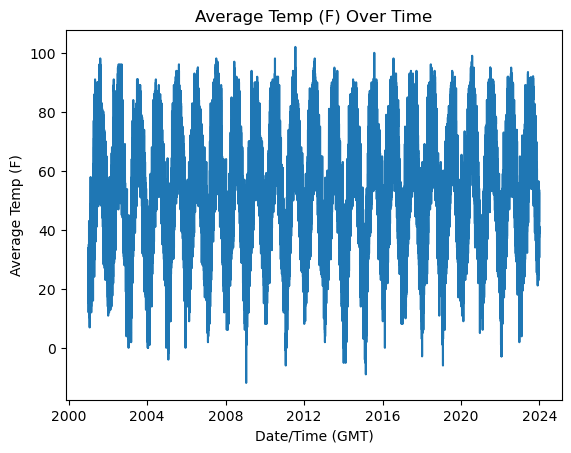

In [107]:
# ANSWER

sns.lineplot(data=df_temps["Average Temp (F)"])
plt.title("Average Temp (F) Over Time")

---
**34)**	[P] That previous plot is a bit ridiculous. You really need to aggregate your data over some time interval. The most meaningful one will be by year. Compute the mean of the hourly average temperature for each year plot this annual value. (HINT: The `resample()` method will again make this incredibly easy to do!)

C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Temp (F) By Year')

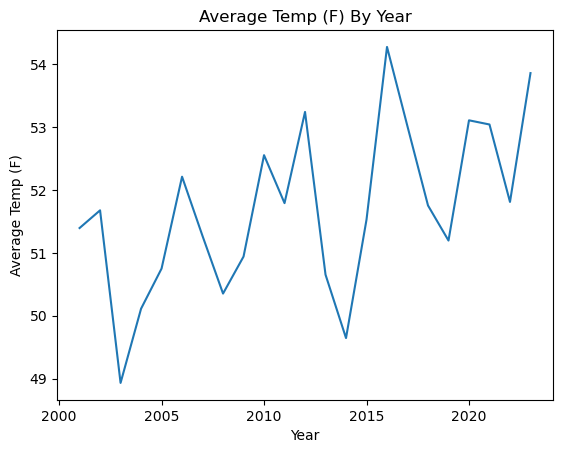

In [108]:
# ANSWER


df_yearly_mean = df_temps['Average Temp (F)'].resample('Y').mean()
sns.lineplot(x=df_yearly_mean.index.year, y=df_yearly_mean.values)
plt.xlabel("Year")
plt.ylabel("Average Temp (F)")
plt.title("Average Temp (F) By Year")

---
**35)** [P] For your final question, redraw the above plot with the addition of a linear regression line that shows uncertainty around the line (HINT: `sns.regplot` will make this easy.). Without surprise these days, it'll show a steady upward trend in the average temperature over the years. 


Text(0.5, 1.0, 'Linear Regression of Average Temp (F) Over Time')

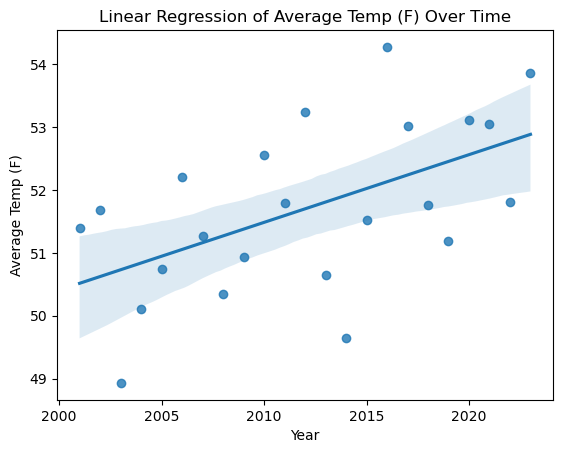

In [109]:
# ANSWER

sns.regplot(x=df_yearly_mean.index.year, y=df_yearly_mean.values)
plt.xlabel("Year")
plt.ylabel("Average Temp (F)")
plt.title("Linear Regression of Average Temp (F) Over Time")

---
Congratulations! At this point, you performed your first real-world example of what you need to go through to complete basic preprocessing steps!

Before you consider your work complete, please verify that your plots looks good. They have a title, and the axes are labeled. You should have a legend if necessary. And, you should have a grid. These are all basic, but important steps to make sure your plots are interpretable by others.

# Deliverables
1.	Be sure you have every cell run, and output generated.
2.	Commit and push `lab06.ipynb`. Verify that your file is pushed properly on Gitlab.
3.	Generate a paginated PDF file of your notebook and upload to Gradescope
4.	Be sure to select the pages that have the specified questions, and submit when done
